In [6]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import Row, SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import DateType
from pyspark.sql.functions import to_timestamp,col,lit


In [1]:
! ls

sample_data


In [4]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz
!tar xf spark-2.3.1-bin-hadoop2.7.tgz
!pip install -q findspark

Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:6 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:11 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic/main Sources [1,765 kB]
Ign:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:13 https://developer.download

In [5]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"

import findspark
findspark.init()
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 
spark

In [7]:
!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD

--2021-05-16 05:53:52--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.199, 52.206.140.205, 52.206.68.26
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [     <=>            ]   1.61G  3.33MB/s    in 9m 53s  

2021-05-16 06:03:45 (2.78 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [1728000926]



In [8]:
!mv rows.csv\?accessType\=DOWNLOAD crimeData.csv

In [9]:
from pyspark.sql.functions import to_timestamp,col,lit
dfa = spark.read.csv('crimeData.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a'))
dfa.show(5)
dfa.count()

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     00

7323343

In [ ]:
from pyspark.sql.functions import to_timestamp,col,lit
#dft = spark.read.csv('crimeData.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') > lit('2010-11-11'))
df.show(5)
df.count()

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     00

2918339

In [ ]:
!ls

sample_data


In [ ]:
df.dtypes

[('ID', 'string'),
 ('Case Number', 'string'),
 ('Date', 'timestamp'),
 ('Block', 'string'),
 ('IUCR', 'string'),
 ('Primary Type', 'string'),
 ('Description', 'string'),
 ('Location Description', 'string'),
 ('Arrest', 'string'),
 ('Domestic', 'string'),
 ('Beat', 'string'),
 ('District', 'string'),
 ('Ward', 'string'),
 ('Community Area', 'string'),
 ('FBI Code', 'string'),
 ('X Coordinate', 'string'),
 ('Y Coordinate', 'string'),
 ('Year', 'string'),
 ('Updated On', 'string'),
 ('Latitude', 'string'),
 ('Longitude', 'string'),
 ('Location', 'string')]

In [ ]:
df.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [ ]:
# Let's import in the relevant types.
from pyspark.sql.types import StructField,StringType,IntegerType,StructType

In [ ]:
from pyspark.sql.types import StructField
from pyspark.sql.types import StructType
from pyspark.sql.types import DoubleType
from pyspark.sql.types import TimestampType
from pyspark.sql.types import BooleanType


In [ ]:
df.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [ ]:
data_schema= [StructField('ID', StringType(),True), 
              StructField('Case Number', StringType(),True),
              StructField('Date',TimestampType(),True),
              StructField('Block', StringType(),True),
              StructField('IUCR', StringType(),True),
              StructField('Primary Type', StringType(),True),
              StructField('Description', StringType(),True),
              StructField('Location Description', StringType(),True),
              StructField('Arrest', StringType(),True),
              StructField('Domestic', BooleanType(),True),
              StructField('Beat', StringType(),True),
              StructField('District', StringType(),True),
              StructField('Ward', StringType(),True),
              StructField('Community Area', StringType(),True),
              StructField('FBI Code', StringType(),True),
              StructField('X Coordinate', StringType(),True),
              StructField('Y Coordinate', StringType(),True),
              StructField('Year', IntegerType(),True),
              StructField('Updated On', StringType(),True),
              StructField('Latitude', DoubleType(),True),
              StructField('Longitude', DoubleType(),True),
              StructField('Location', StringType(),True)]
final_struct = StructType(fields=data_schema)

In [ ]:
df.select('IUCR','Case Number','Date').show(5)

+----+-----------+-------------------+
|IUCR|Case Number|               Date|
+----+-----------+-------------------+
|0486|   HY411648|2015-09-05 13:30:00|
|0870|   HY411615|2015-09-04 11:30:00|
|0810|   JC213529|2018-09-01 00:01:00|
|2023|   HY411595|2015-09-05 12:45:00|
|0560|   HY411610|2015-09-05 13:00:00|
+----+-----------+-------------------+
only showing top 5 rows



In [ ]:

from pyspark.sql.functions import lit
df.withColumn('one',lit(4)).show(5)

NameError: ignored

In [ ]:
df=df.drop('one')

In [ ]:
for col in list(df.columns):
    print(col, df.filter((df[col] == "") | df[col].isNull()).count())

## Identify the number of Null | NaN | Empty values in every column

ID 0
Case Number 1
Date 0
Block 0
IUCR 0
Primary Type 0
Description 0
Location Description 8022
Arrest 0
Domestic 0
Beat 0
District 1
Ward 59
Community Area 236
FBI Code 0
X Coordinate 26219
Y Coordinate 26219
Year 0
Updated On 0
Latitude 26219
Longitude 26219
Location 26219


In [ ]:
### 3.Visualizing & Understanding the data

In [11]:

# crime types count
crimeTypeG = dfa.groupBy('Primary Type').count()

#crime localisations count
crimeLocG = dfa.groupBy('Location Description').count()

In [ ]:
crimeTypeG.show()

+--------------------+-------+
|        Primary Type|  count|
+--------------------+-------+
|OFFENSE INVOLVING...|  51216|
|CRIMINAL SEXUAL A...|   3040|
|            STALKING|   3939|
|PUBLIC PEACE VIOL...|  50943|
|           OBSCENITY|    727|
|NON-CRIMINAL (SUB...|      9|
|               ARSON|  12318|
|   DOMESTIC VIOLENCE|      1|
|            GAMBLING|  14597|
|   CRIMINAL TRESPASS| 206269|
|             ASSAULT| 465821|
|      NON - CRIMINAL|     38|
|LIQUOR LAW VIOLATION|  14497|
| MOTOR VEHICLE THEFT| 337533|
|               THEFT|1541439|
|             BATTERY|1341214|
|             ROBBERY| 275030|
|            HOMICIDE|  11034|
|           RITUALISM|     24|
|    PUBLIC INDECENCY|    186|
+--------------------+-------+
only showing top 20 rows



In [12]:
#Order the groups we collected

crimeType_counts = crimeTypeG.orderBy('count', ascending=False)
crimeLoc_counts = crimeLocG.orderBy('count', ascending=False)

In [ ]:
#Top crime types 

# we can summarize of the 'trending' crimes by types & by locations

dfa.groupby('Primary Type').count().orderBy('count', ascending=False).show()
dfa.groupby('Location Description').count().orderBy('count', ascending=False).show()

+--------------------+-------+
|        Primary Type|  count|
+--------------------+-------+
|               THEFT|1541439|
|             BATTERY|1341214|
|     CRIMINAL DAMAGE| 833799|
|           NARCOTICS| 737695|
|             ASSAULT| 465821|
|       OTHER OFFENSE| 454712|
|            BURGLARY| 409658|
| MOTOR VEHICLE THEFT| 337533|
|  DECEPTIVE PRACTICE| 311582|
|             ROBBERY| 275030|
|   CRIMINAL TRESPASS| 206269|
|   WEAPONS VIOLATION|  88942|
|        PROSTITUTION|  69388|
|OFFENSE INVOLVING...|  51216|
|PUBLIC PEACE VIOL...|  50943|
|         SEX OFFENSE|  28077|
| CRIM SEXUAL ASSAULT|  27909|
|INTERFERENCE WITH...|  17614|
|            GAMBLING|  14597|
|LIQUOR LAW VIOLATION|  14497|
+--------------------+-------+
only showing top 20 rows

+--------------------+-------+
|Location Description|  count|
+--------------------+-------+
|              STREET|1900444|
|           RESIDENCE|1243976|
|           APARTMENT| 788229|
|            SIDEWALK| 704579|
|            

In [55]:
# ?????
crimeType_counts_RDD = pd.DataFrame(crimeType_counts.rdd.map(lambda line: line.asDict()).collect()).head(20)
crimeLoc_counts_RDD = pd.DataFrame(crimeLoc_counts.rdd.map(lambda line: line.asDict()).collect()).head(20)

[Text(0, 0.5, 'Primary Type'), Text(0.5, 0, 'Crimes Record Count')]

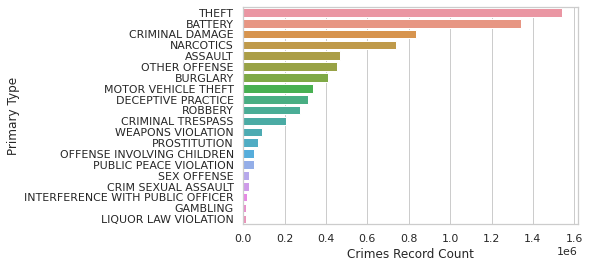

In [14]:

## Just some seaborn params for a better view
sns.set(style="whitegrid")
sns.set_color_codes("dark")

type_graph = sns.barplot(x='count', y='Primary Type', data=crimeType_counts_RDD)
type_graph.set(ylabel="Primary Type", xlabel="Crimes Record Count")

#Visualizing data records by primary type and their count

[Text(0, 0.5, 'location description'), Text(0.5, 0, 'Crimes Record Count')]

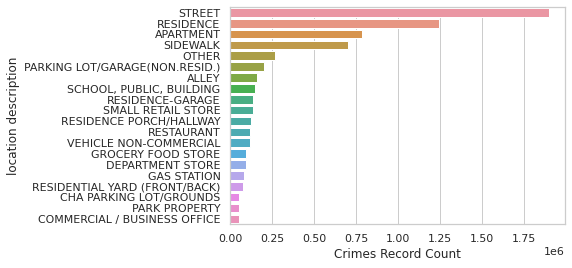

In [15]:

type_graph = sns.barplot(x='count', y='Location Description', data=crimeLoc_counts_RDD)
type_graph.set(ylabel="location description", xlabel="Crimes Record Count")

#Visualizing data records by primary type and their coun

In [ ]:
#What percentage of reported crimes resulted in an arrest?
df.groupby('Arrest').count().show()


+------+-------+
|Arrest|  count|
+------+-------+
| false|5342244|
|  true|1979449|
+------+-------+



In [ ]:
dfa.select('Arrest').distinct().show()

+------+
|Arrest|
+------+
| false|
|  true|
+------+



In [ ]:
from pyspark.sql.functions import col
dfa.filter(col('Arrest')=='true').count()/dfa.select('Arrest').count()

0.2703540014584059

In [ ]:
dfa.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [ ]:
# functions:
from pyspark.sql import functions
print(dir(functions))

['AutoBatchedSerializer', 'Column', 'DataFrame', 'DataType', 'PandasUDFType', 'PickleSerializer', 'PythonEvalType', 'SparkContext', 'StringType', 'UserDefinedFunction', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_binary_mathfunctions', '_collect_list_doc', '_collect_set_doc', '_create_binary_mathfunction', '_create_function', '_create_udf', '_create_window_function', '_functions', '_functions_1_4', '_functions_1_6', '_functions_2_1', '_functions_deprecated', '_lit_doc', '_message', '_string_functions', '_test', '_to_java_column', '_to_seq', '_window_functions', '_wrap_deprecated_function', 'abs', 'acos', 'add_months', 'approxCountDistinct', 'approx_count_distinct', 'array', 'array_contains', 'asc', 'ascii', 'asin', 'atan', 'atan2', 'avg', 'base64', 'bin', 'bitwiseNOT', 'blacklist', 'broadcast', 'bround', 'cbrt', 'ceil', 'coalesce', 'col', 'collect_list', 'collect_set', 'column', 'concat', 'concat_ws', 'conv', 'c

In [ ]:
from pyspark.sql.functions import lower, upper, substring

In [ ]:
help(substring)

Help on function substring in module pyspark.sql.functions:

substring(str, pos, len)
    Substring starts at `pos` and is of length `len` when str is String type or
    returns the slice of byte array that starts at `pos` in byte and is of length `len`
    when str is Binary type.
    
    .. note:: The position is not zero based, but 1 based index.
    
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(substring(df.s, 1, 2).alias('s')).collect()
    [Row(s='ab')]
    
    .. versionadded:: 1.5



In [ ]:
dfa.select(lower(col('Primary Type')),upper(col('Primary Type')), substring(col('Primary Type'), 1,4)).show(5)

+-------------------+-------------------+-----------------------------+
|lower(Primary Type)|upper(Primary Type)|substring(Primary Type, 1, 4)|
+-------------------+-------------------+-----------------------------+
|            battery|            BATTERY|                         BATT|
|              theft|              THEFT|                         THEF|
|              theft|              THEFT|                         THEF|
|          narcotics|          NARCOTICS|                         NARC|
|            assault|            ASSAULT|                         ASSA|
+-------------------+-------------------+-----------------------------+
only showing top 5 rows



In [ ]:
#most recent and oldest date
from pyspark.sql.functions import max, min
dfa.select(min(col('Date')),max(col('Date'))).show(5)

+-------------------+-------------------+
|          min(Date)|          max(Date)|
+-------------------+-------------------+
|2001-01-01 00:00:00|2021-05-06 23:49:00|
+-------------------+-------------------+



In [ ]:
#joining the dataset crime to police station 
!wget https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
!ls -l

--2021-05-14 12:45:27--  https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.205, 52.206.140.199, 52.206.68.26
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [ <=>                ]   5.57K  --.-KB/s    in 0s      

2021-05-14 12:45:27 (568 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [5699]

total 2128588
-rw-r--r--  1 root root 1727870896 May 14 11:03  crimeData.csv
-rw-r--r--  1 root root        587 May 14 12:29  police-station.csv
-rw-r--r--  1 root root       5699 Aug 19  2019 'rows.csv?accessType=DOWNLOAD'
drwxr-xr-x  1 root root       4096 May  6 13:44  sample_data
drwxrwxr-x 13 1000 1000       4096 Jun  1  2018  spark-2.3.1-bin-hadoop2.7
-rw-r--r--  1 root root  225883783 Jun  1  2018  spar

In [16]:
ps=spark.read.csv('Police_Stations.csv',header=True)
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 1172080.029| 1908086.527|41.90324165|-87.64335214|(41.9032416531, -

In [17]:
ps.select(col('DISTRICT')).distinct().show()

+------------+
|    DISTRICT|
+------------+
|           7|
|          15|
|          11|
|           3|
|           8|
|          22|
|          16|
|           5|
|          18|
|          17|
|           6|
|          19|
|          25|
|Headquarters|
|          24|
|           9|
|           1|
|          20|
|          10|
|           4|
+------------+
only showing top 20 rows



In [18]:
from pyspark.sql.functions import lpad

In [19]:
#ADDING ZERO TO LEFT OF THE FEATURE
ps.select(lpad(col('DISTRICT'),3,'0')).show()
# so we must add new column to ps to contain new format 
ps.withColumn('Format_district',lpad(col('DISTRICT'),3,'0')).show()

+--------------------+
|lpad(DISTRICT, 3, 0)|
+--------------------+
|                 Hea|
|                 018|
|                 019|
|                 020|
|                 022|
|                 024|
|                 025|
|                 001|
|                 002|
|                 003|
|                 004|
|                 005|
|                 006|
|                 007|
|                 008|
|                 009|
|                 010|
|                 011|
|                 012|
|                 ",C|
+--------------------+
only showing top 20 rows

+--------------------+-----------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|            DISTRICT|    DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|

In [ ]:
dfa.join(ps, dfa.District == ps.Format_district, 'left-outer').show()

AttributeError: ignored

In [ ]:
help(join)

NameError: ignored

In [ ]:
#what is the most frequency reported non-criminal activity
#for finiding the count of each categories
dfa.select(col('Primary Type')).distinct().count()

In [ ]:
dfa.select(col('Primary Type')).distinct().orderBy(col('Primary Type')).show(36,truncate=False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|ARSON                            |
|ASSAULT                          |
|BATTERY                          |
|BURGLARY                         |
|CONCEALED CARRY LICENSE VIOLATION|
|CRIM SEXUAL ASSAULT              |
|CRIMINAL DAMAGE                  |
|CRIMINAL SEXUAL ASSAULT          |
|CRIMINAL TRESPASS                |
|DECEPTIVE PRACTICE               |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|HOMICIDE                         |
|HUMAN TRAFFICKING                |
|INTERFERENCE WITH PUBLIC OFFICER |
|INTIMIDATION                     |
|KIDNAPPING                       |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|NARCOTICS                        |
|NON - CRIMINAL                   |
|NON-CRIMINAL                     |
|NON-CRIMINAL (SUBJECT SPECIFIED) |
|OBSCENITY                        |
|OFFENSE INVOLVING CHILDREN 

In [ ]:
cc=dfa.filter((col('Primary Type') == 'NON - CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL'))

In [ ]:
cc.count()

212

In [62]:
dfa.groupBy(col('Description')).count().orderBy('count', ascending=False).show(truncate=False)

+-----------------------------+------+
|Description                  |count |
+-----------------------------+------+
|SIMPLE                       |860376|
|$500 AND UNDER               |595796|
|DOMESTIC BATTERY SIMPLE      |571045|
|TO VEHICLE                   |404487|
|TO PROPERTY                  |385689|
|OVER $500                    |379019|
|POSS: CANNABIS 30GMS OR LESS |278140|
|FORCIBLE ENTRY               |275960|
|AUTOMOBILE                   |266904|
|FROM BUILDING                |245261|
|RETAIL THEFT                 |187530|
|TELEPHONE THREAT             |142803|
|TO LAND                      |127210|
|POSS: CRACK                  |121112|
|UNLAWFUL ENTRY               |110128|
|HARASSMENT BY TELEPHONE      |106146|
|AGGRAVATED: OTHER DANG WEAPON|96758 |
|POSS: HEROIN(WHITE)          |95786 |
|ARMED: HANDGUN               |93611 |
|STRONGARM - NO WEAPON        |91948 |
+-----------------------------+------+
only showing top 20 rows



In [46]:
#Facilitate data viswualisation based on dates

In [39]:
#which of the week has the most crime?
from pyspark.sql.functions import dayofweek
from pyspark.sql.functions import date_format
dfa.select(col('Date'),dayofweek(col('Date')),date_format(col('Date'), 'E')).show(10)
# using collect to access row object
dfa.groupBy(date_format(col('Date'),'E')).count().collect()
dfa.groupBy(date_format(col('Date'),'E')).count().orderBy('count',ascending=False).show(5)

+-------------------+---------------+--------------------+
|               Date|dayofweek(Date)|date_format(Date, E)|
+-------------------+---------------+--------------------+
|2015-09-05 13:30:00|              7|                 Sat|
|2015-09-04 11:30:00|              6|                 Fri|
|2018-09-01 00:01:00|              7|                 Sat|
|2015-09-05 12:45:00|              7|                 Sat|
|2015-09-05 13:00:00|              7|                 Sat|
|2015-09-05 10:55:00|              7|                 Sat|
|2015-09-04 18:00:00|              6|                 Fri|
|2015-09-05 13:00:00|              7|                 Sat|
|2015-09-05 11:30:00|              7|                 Sat|
|2016-05-01 00:25:00|              1|                 Sun|
+-------------------+---------------+--------------------+
only showing top 10 rows

+--------------------+-------+
|date_format(Date, E)|  count|
+--------------------+-------+
|                 Fri|1101667|
|                 Wed|10

In [40]:
# extraction of day of the week and count to plot them
dow=[x[0] for x in dfa.groupBy(date_format(col('Date'),'E')).count().collect()]
dow
cnt=[x[1] for x in dfa.groupBy(date_format(col('Date'),'E')).count().collect()]
cnt

[993251, 1034433, 1043688, 1047839, 1054390, 1101667, 1047533]

In [42]:
cp=pd.DataFrame({'DayOfWeek': dow,'Count':cnt})
cp.head()

,DayOfWeek,Count
0,Sun,993251
1,Mon,1034433
2,Thu,1043688
3,Sat,1047839
4,Wed,1054390


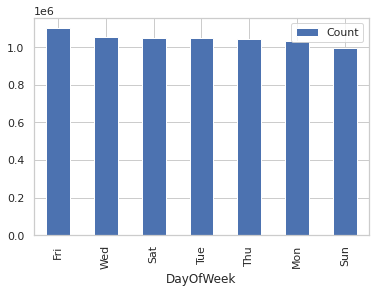

In [45]:
cp.sort_values('Count',ascending=False).plot(kind='bar', x='DayOfWeek', y='Count')

In [48]:
df = dfa.withColumn('date_time', to_timestamp('date', 'MM/dd/yyyy hh:mm:ss a'))\
       .withColumn('month', trunc('date_time', 'MM'))
df.show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+-------------------+----------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|          date_time|     month|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+-------------------+----------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOO

# Data analysis base on dates

In [53]:
# crime types and arrest over years:
arrestTypeD = df.groupBy(['Arrest', 'Month']).count().orderBy(['count'], ascending=[True, False]).dropna().show(4, truncate=False)

+------+----------+-----+
|Arrest|Month     |count|
+------+----------+-----+
|true  |2021-05-01|346  |
|true  |2020-04-01|1445 |
|true  |2021-02-01|1803 |
|true  |2021-04-01|1881 |
+------+----------+-----+
only showing top 4 rows



In [50]:
# locations of crimes and arrest over years:
arrestLocD = df.groupBy(['Arrest','Location Description', 'Month']).count().orderBy(['count'], ascending=[True, False]).dropna().show(10, truncate=False)
arrestLocD = df.groupBy(['Arrest','Location Description', 'Month']).count().orderBy(['count'], ascending=[True, False])

+------+---------------------------------+----------+-----+
|Arrest|Location Description             |Month     |count|
+------+---------------------------------+----------+-----+
|false |CREDIT UNION                     |2019-09-01|1    |
|false |DELIVERY TRUCK                   |2011-07-01|1    |
|true  |GAS STATION DRIVE/PROP.          |2003-01-01|1    |
|false |HIGHWAY/EXPRESSWAY               |2018-02-01|1    |
|false |RETAIL STORE                     |2012-11-01|1    |
|true  |YARD                             |2001-09-01|1    |
|true  |FOREST PRESERVE                  |2003-07-01|1    |
|true  |COLLEGE/UNIVERSITY RESIDENCE HALL|2017-06-01|1    |
|true  |PARKING LOT                      |2006-01-01|1    |
|true  |RESIDENTIAL YARD (FRONT/BACK)    |2004-09-01|1    |
+------+---------------------------------+----------+-----+
only showing top 10 rows



In [85]:
## Making dataframe from RDD
arrestTypeD = df.groupBy(['Arrest', 'Month']).count().orderBy(['count'], ascending=[True, False]).dropna()
arrestLocD = df.groupBy(['Arrest','Location Description', 'Month']).count().orderBy(['count'], ascending=[True, False]).dropna()
arrestTypeRDD = pd.DataFrame(arrestTypeD.rdd.map(lambda line: line.asDict()).collect()).dropna()
## Adding a column of Year & column for Month's name and dropping na
arrestTypeRDD['year_Nm'] = arrestTypeRDD['Month'].apply(lambda dt: datetime.datetime.strftime(pd.Timestamp(dt), '%Y'))
arrestTypeRDD['Month_Name'] = arrestTypeRDD['Month'].apply(lambda dt: datetime.datetime.strftime(pd.Timestamp(dt), '%b'))
arrestTypeRDD.head(10)

,Arrest,Month,count,year_Nm,Month_Name
0,true,2021-05-01,346,2021,May
1,true,2020-04-01,1445,2020,Apr
2,true,2021-02-01,1803,2021,Feb
3,true,2021-04-01,1881,2021,Apr
4,true,2021-03-01,2137,2021,Mar
5,true,2021-01-01,2186,2021,Jan
6,true,2020-12-01,2237,2020,Dec
7,true,2020-06-01,2304,2020,Jun
8,true,2020-11-01,2342,2020,Nov
9,true,2020-10-01,2547,2020,Oct


In [86]:
# Data for plotting

arrestYear = arrestTypeRDD[['year_Nm', 'count', 'Arrest']].copy()

## Let's filter all False Arrests => we have all True arrests
index_nm1 = arrestYear[arrestYear['Arrest'] == 'false' ].index

# Delete these row indexes from dataFrame
arrestYear.drop(index_nm1 , inplace=True)

## Same for False arrests
arrestYearNo = arrestTypeRDD[['year_Nm', 'count', 'Arrest']].copy()

## Let's filter all True Arrests => we have all False arrests
index_nm2 = arrestYearNo[arrestYearNo['Arrest'] == 'true' ].index

# Delete these row indexes from dataFrame
arrestYearNo.drop(index_nm2 , inplace=True)



In [87]:
arrestYear.head(5)

,year_Nm,count,Arrest
0,2021,346,true
1,2020,1445,true
2,2021,1803,true
3,2021,1881,true
4,2021,2137,true


In [88]:
arrestYearNo.head(5)

,year_Nm,count,Arrest
12,2021,2757,false
172,2021,10845,false
183,2015,11240,false
190,2020,11403,false
232,2014,12212,false


In [70]:
#What percentage of reported crimes resulted in an arrest?
df.groupby('Arrest').count().show()

+------+-------+
|Arrest|  count|
+------+-------+
| false|5343211|
|  true|1979590|
+------+-------+



In [89]:
arrestYear = arrestYear.groupby(['year_Nm']).sum()
arrestYearNo = arrestYearNo.groupby(['year_Nm']).sum()

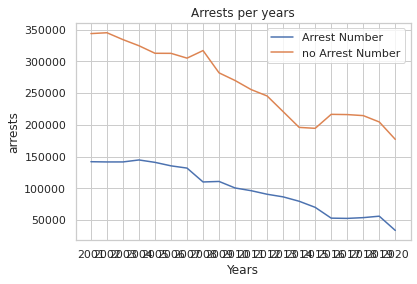

In [128]:
## view  arrests by years 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

yr = ['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010', '2011','2012','2013','2014','2015','2016','2017','2018','2019', '2020']
ax.plot(yr, arrestYear['count'].drop('2021'), label='Arrest Number')
ax.plot(yr, arrestYearNo['count'].drop('2021'), label='no Arrest Number')

ax.set(xlabel='Years', ylabel='arrests',title='Arrests per years')
ax.grid(b=True, which='both', axis='y')

ax.legend()

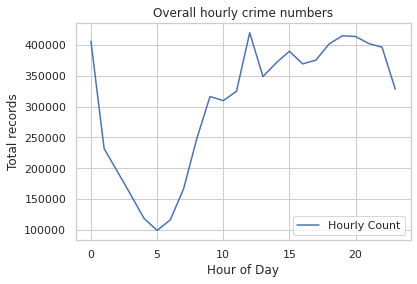

In [129]:
# Extract the "hour" field from the date into a separate column called "hour"
df_hour = df.withColumn('hour', hour(df['Date']))
# Derive a data frame with crime counts per hour of the day:
hourly_count = df_hour.groupBy(['Primary Type', 'hour']).count().cache()
hourly_total_count = hourly_count.groupBy('hour').sum('count')

hourly_count_pddf = pd.DataFrame(hourly_total_count.select(hourly_total_count['hour'], hourly_total_count['sum(count)'].alias('count'))\
                                .rdd.map(lambda l: l.asDict())\
                                 .collect())
hourly_count_pddf = hourly_count_pddf.sort_values(by='hour')

fig, ax = plt.subplots()
ax.plot(hourly_count_pddf['hour'], hourly_count_pddf['count'], label='Hourly Count')

ax.set(xlabel='Hour of Day', ylabel='Total records',
       title='Overall hourly crime numbers')
ax.grid(b=True, which='both', axis='y')
ax.legend()

In [137]:

import numpy as np
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import pandas as pd
import pyspark
import pyspark.sql.functions as F
from pyspark.sql.types import DoubleType, StringType, ArrayType
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorAssembler

In [154]:
dfh = df.withColumn('hour', hour(df['date_time'])).dropna()
## Count crimes by hours & types
hourly_count = dfh.groupBy(['Primary Type', 'hour']).count().cache()
hourly_count.show(5)

+-----------------+----+-----+
|     Primary Type|hour|count|
+-----------------+----+-----+
|WEAPONS VIOLATION|  23| 6402|
|        OBSCENITY|  11|   28|
|        OBSCENITY|  14|   39|
|          ROBBERY|  14|10652|
|      SEX OFFENSE|  18| 1155|
+-----------------+----+-----+
only showing top 5 rows



In [155]:
# Number of types of location recorded in the dataset
#df.select('location_description').distinct().count()
dfh.select('Location Description', 'hour', 'Primary Type').distinct()

DataFrame[Location Description: string, hour: int, Primary Type: string]

In [156]:
location_hour = pd.DataFrame(dfh.select('Location Description', 'hour', 'Primary Type').distinct().rdd.map(lambda l: l.asDict()).collect())
location_hour

,Location Description,hour,Primary Type
0,STREET,15,WEAPONS VIOLATION
1,APARTMENT,23,OTHER OFFENSE
2,STREET,15,CRIMINAL TRESPASS
3,STREET,15,BATTERY
4,GAS STATION,3,THEFT
...,...,...,...
38615,POLICE FACILITY / VEHICLE PARKING LOT,8,BATTERY
38616,GOVERNMENT BUILDING / PROPERTY,12,OFFENSE INVOLVING CHILDREN
38617,RESIDENCE - GARAGE,14,NARCOTICS
38618,CHURCH / SYNAGOGUE / PLACE OF WORSHIP,15,NARCOTICS


In [149]:
#Being on the street and at home
street_home_hour = location_hour.where((location_hour['Location Description'] == 'STREET') | (location_hour['Location Description'] == 'RESIDENCE')).dropna().sort_values(by='hour')
street_home_hour.head(4)

,Location Description,hour,Primary Type
7586,STREET,0.0,NARCOTICS
17545,RESIDENCE,0.0,BURGLARY
26842,STREET,0.0,HOMICIDE
8371,RESIDENCE,0.0,WEAPONS VIOLATION


In [169]:
dfh.show(5)

+--------+-----------+-------------------+-------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+-------------------+----------+----+
|      ID|Case Number|               Date|              Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|          date_time|     month|hour|
+--------+-----------+-------------------+-------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+-------------------+----------+----+
|10224738|   HY411648|2015-09-05 13:30:00|    

In [157]:
#Let's split our date data 
#=> day of the week, day of the month
dfk = dfh.withColumn('week_day', dayofweek(df_hour['Date']))\
                 .withColumn('year_month', month(df_hour['Date']))\
                 .withColumn('month_day', dayofmonth(df_hour['Date']))\
                 .withColumn('date_number', datediff(df['Date'], to_date(lit('2001-01-01'), format='yyyy-MM-dd')))\
                 .cache()

In [163]:
dfk.select(['date', 'Month', 'hour', 'week_day', 'Year', 'year_month', 'month_day', 'date_number']).show(20, truncate=False)

+-------------------+----------+----+--------+----+----------+---------+-----------+
|date               |Month     |hour|week_day|Year|year_month|month_day|date_number|
+-------------------+----------+----+--------+----+----------+---------+-----------+
|2015-09-05 13:30:00|2015-09-01|13  |7       |2015|9         |5        |5360       |
|2015-09-04 11:30:00|2015-09-01|11  |6       |2015|9         |4        |5359       |
|2015-09-05 12:45:00|2015-09-01|12  |7       |2015|9         |5        |5360       |
|2015-09-05 13:00:00|2015-09-01|13  |7       |2015|9         |5        |5360       |
|2015-09-05 10:55:00|2015-09-01|10  |7       |2015|9         |5        |5360       |
|2015-09-04 18:00:00|2015-09-01|18  |6       |2015|9         |4        |5359       |
|2015-09-05 13:00:00|2015-09-01|13  |7       |2015|9         |5        |5360       |
|2015-09-05 11:30:00|2015-09-01|11  |7       |2015|9         |5        |5360       |
|2015-09-05 14:00:00|2015-09-01|14  |7       |2015|9         |5  

In [170]:
dfk.show(5)

+--------+-----------+-------------------+-------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+-------------------+----------+----+--------+----------+---------+-----------+
|      ID|Case Number|               Date|              Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|          date_time|     month|hour|week_day|year_month|month_day|date_number|
+--------+-----------+-------------------+-------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------

# The model description

In [173]:
#1-Logistic Regression
features = [
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'hour',
 'week_day',
 'year_month',
 'month_day',
 'date_number']

In [176]:
#Let's see the schema of these selected features:
dffet = dfk.select(features)
dffet.printSchema()

root
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- hour: integer (nullable = true)
 |-- week_day: integer (nullable = true)
 |-- year_month: integer (nullable = true)
 |-- month_day: integer (nullable = true)
 |-- date_number: integer (nullable = true)



In [177]:
#  counts all selected features...
featureCount = []

for feature in features:
    print('Analysing %s' % feature)
    df_li = dffet.select(feature).distinct()
    featureCount.append({'feature': feature, 'level_count': df_li.count()})

Analysing Location Description
Analysing Arrest
Analysing Domestic
Analysing Beat
Analysing District
Analysing Ward
Analysing Community Area
Analysing FBI Code
Analysing hour
Analysing week_day
Analysing year_month
Analysing month_day
Analysing date_number


In [178]:
pd.DataFrame(featureCount).sort_values(by='level_count', ascending=False)

,feature,level_count
12,date_number,7428
3,Beat,303
0,Location Description,214
6,Community Area,78
5,Ward,50
11,month_day,31
7,FBI Code,26
4,District,24
8,hour,24
10,year_month,12


# ML prepration

In [179]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
dfDateFeatures = dfk.na.drop(subset=features)

In [180]:
#use Spark's string indexer to index selected features
for feature in featureCount:
    indexer = StringIndexer(inputCol=feature['feature'], outputCol='%s_indexed' % feature['feature'])
    print('Fitting feature "%s"' % feature['feature'])
    model = indexer.fit(dfDateFeatures)
    print('Transforming "%s"' % feature['feature'])
    dfDateFeatures = model.transform(dfDateFeatures)

Fitting feature "Location Description"
Transforming "Location Description"
Fitting feature "Arrest"
Transforming "Arrest"
Fitting feature "Domestic"
Transforming "Domestic"
Fitting feature "Beat"
Transforming "Beat"
Fitting feature "District"
Transforming "District"
Fitting feature "Ward"
Transforming "Ward"
Fitting feature "Community Area"
Transforming "Community Area"
Fitting feature "FBI Code"
Transforming "FBI Code"
Fitting feature "hour"
Transforming "hour"
Fitting feature "week_day"
Transforming "week_day"
Fitting feature "year_month"
Transforming "year_month"
Fitting feature "month_day"
Transforming "month_day"
Fitting feature "date_number"
Transforming "date_number"


In [181]:
## String-index the response variable:
response_indexer = StringIndexer(inputCol='Primary Type', outputCol='primary_type_inx')
response_model = response_indexer.fit(dfDateFeatures)
dfDateFeatures = response_model.transform(dfDateFeatures)

In [183]:

# vectorize the features
# use a vector assembler to vectorize all predictors into a features column
indexed_features = ['%s_indexed' % fc['feature'] for fc in featureCount]
indexed_features

['Location Description_indexed',
 'Arrest_indexed',
 'Domestic_indexed',
 'Beat_indexed',
 'District_indexed',
 'Ward_indexed',
 'Community Area_indexed',
 'FBI Code_indexed',
 'hour_indexed',
 'week_day_indexed',
 'year_month_indexed',
 'month_day_indexed',
 'date_number_indexed']

In [184]:
assembler = VectorAssembler(inputCols=indexed_features, outputCol='features')
vectorized_df_dates = assembler.transform(dfDateFeatures)

In [185]:
vectorized_df_dates.select('features').take(1)

[Row(features=DenseVector([1.0, 0.0, 1.0, 137.0, 7.0, 37.0, 16.0, 1.0, 11.0, 2.0, 5.0, 11.0, 4963.0]))]

In [186]:

#Now let's train the model.
# using 80% to 20% split between the train and the test datasets
# train a logistic regression.

In [189]:
train, test = vectorized_df_dates.randomSplit([0.8, 0.2])


In [190]:
from pyspark.ml.classification import LogisticRegression
logisticRegression = LogisticRegression(labelCol='primary_type_inx', featuresCol='features', maxIter=10, family='multinomial')
fittedModel = logisticRegression.fit(train)

In [218]:
#Model performance analysis
fittedModel.summary.accuracy

0.4843752088391358

In [219]:
model_summary = fittedModel.summary

In [220]:
fittedModel.coefficientMatrix

DenseMatrix(35, 13, [0.0171, -1.5948, -2.3527, 0.0029, 0.0509, 0.0062, 0.0026, -1.2389, ..., 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0], 1)

In [232]:
print(fittedModel.coefficientMatrix)

DenseMatrix([[ 1.70907688e-02, -1.59475732e+00, -2.35269124e+00,
               2.89089181e-03,  5.09363625e-02,  6.23432293e-03,
               2.60880087e-03, -1.23890499e+00,  4.46014800e-02,
               1.24546376e-01,  4.49727935e-02,  3.16857683e-02,
               1.43434310e-04],
             [ 1.44794226e-02, -3.03566735e-01,  2.55016661e+00,
               1.61167971e-03,  2.19476133e-02,  3.41357551e-04,
               1.84392602e-03, -3.50363437e-01,  2.88474629e-02,
               9.04388932e-02,  1.87964538e-02,  1.75247542e-02,
              -4.95134677e-06],
             [-2.08694741e-03, -2.49861438e+00,  5.35906035e-01,
               9.63386301e-04,  1.01603743e-02,  1.47014524e-02,
               4.86175798e-03, -3.92596992e-01,  4.33505965e-02,
               1.10181756e-01,  3.39154134e-02,  2.50324365e-02,
               7.79251263e-05],
             [-4.06756581e-02,  6.69135993e+00, -2.28019395e+00,
              -3.53104857e-03, -4.49675571e-02, -3.21416665

In [222]:
print('Model:\nNum Classes = %s\nNum Features = %s' % (fittedModel.numClasses, fittedModel.numFeatures))


Model:
Num Classes = 35
Num Features = 13
Coefficient matrix:
Row count = 35
Col count = 13


In [ ]:
print('Coefficient matrix:\nRow count = %s\nCol count = %s' % (fittedModel.coefficientMatrix.numRows, fittedModel.coefficientMatrix.numCols))

In [238]:
print('Training "Primary Type" factor level count = %s' % train.select('primary_type_inx').distinct().count())

Training "Primary Type" factor level count = 35


In [223]:
vectorized_df_dates.select('features').show(2, truncate=False)

+---------------------------------------------------------------+
|features                                                       |
+---------------------------------------------------------------+
|[1.0,0.0,1.0,137.0,7.0,37.0,16.0,1.0,11.0,2.0,5.0,11.0,4963.0] |
|[29.0,0.0,0.0,112.0,13.0,18.0,0.0,0.0,13.0,0.0,5.0,25.0,4407.0]|
+---------------------------------------------------------------+
only showing top 2 rows



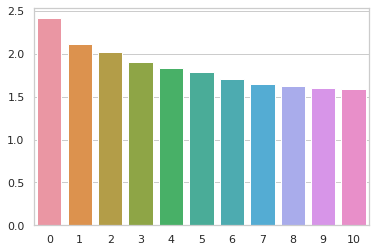

In [233]:
sns.barplot(y=model_summary.objectiveHistory, x=list(range(len(model_summary.objectiveHistory))))

In [217]:

print('Training "primary_type" factor level count = %s' % train.select('primary_type_inx').distinct().count())

Training "primary_type" factor level count = 35


In [215]:
fittedModel.interceptVector.values.size

35

In [236]:
print(model_summary.objectiveHistory)
print()
print('Objective history size ', len(model_summary.objectiveHistory))

[2.4151677605431026, 2.1195337091774324, 2.0206846482560894, 1.8998655772783497, 1.8311240293790527, 1.7897183223612496, 1.7020473524048687, 1.6432047447001628, 1.621218052070375, 1.6070109146866467, 1.5890302427661933]

Objective history size  11


In [204]:
label_stats = {float(i):{'index': float(i)} for i in range(34)}
print(label_stats)

{0.0: {'index': 0.0}, 1.0: {'index': 1.0}, 2.0: {'index': 2.0}, 3.0: {'index': 3.0}, 4.0: {'index': 4.0}, 5.0: {'index': 5.0}, 6.0: {'index': 6.0}, 7.0: {'index': 7.0}, 8.0: {'index': 8.0}, 9.0: {'index': 9.0}, 10.0: {'index': 10.0}, 11.0: {'index': 11.0}, 12.0: {'index': 12.0}, 13.0: {'index': 13.0}, 14.0: {'index': 14.0}, 15.0: {'index': 15.0}, 16.0: {'index': 16.0}, 17.0: {'index': 17.0}, 18.0: {'index': 18.0}, 19.0: {'index': 19.0}, 20.0: {'index': 20.0}, 21.0: {'index': 21.0}, 22.0: {'index': 22.0}, 23.0: {'index': 23.0}, 24.0: {'index': 24.0}, 25.0: {'index': 25.0}, 26.0: {'index': 26.0}, 27.0: {'index': 27.0}, 28.0: {'index': 28.0}, 29.0: {'index': 29.0}, 30.0: {'index': 30.0}, 31.0: {'index': 31.0}, 32.0: {'index': 32.0}, 33.0: {'index': 33.0}}


In [235]:

print("False positive rate by label:")
for i, rate in enumerate(model_summary.falsePositiveRateByLabel):
    label_stats[i]['false_positive_rate'] = rate
    
for i, rate in enumerate(model_summary.truePositiveRateByLabel):
    label_stats[i]['true_positive_rate'] = rate
    
for i, rate in enumerate(model_summary.precisionByLabel):
    label_stats[i]['precision_rate'] = rate
    
for i, rate in enumerate(model_summary.recallByLabel):
    label_stats[i]['recall_rate'] = rate
    
for i, rate in enumerate(model_summary.fMeasureByLabel()):
    label_stats[i]['f_measure'] = rate

False positive rate by label:


KeyError: ignored

In [197]:
train_rdd = train.select(['Primary Type', 'primary_type_inx']).distinct().orderBy('primary_type_inx').rdd.map(lambda l: l.asDict()).collect()

In [199]:
for l in train_rdd:
    print(l)
    label_stats[l['primary_type_inx']]['Primary Type'] = l['Primary Type']

{'Primary Type': 'THEFT', 'primary_type_inx': 0.0}
{'Primary Type': 'BATTERY', 'primary_type_inx': 1.0}
{'Primary Type': 'CRIMINAL DAMAGE', 'primary_type_inx': 2.0}
{'Primary Type': 'NARCOTICS', 'primary_type_inx': 3.0}
{'Primary Type': 'ASSAULT', 'primary_type_inx': 4.0}
{'Primary Type': 'OTHER OFFENSE', 'primary_type_inx': 5.0}
{'Primary Type': 'BURGLARY', 'primary_type_inx': 6.0}
{'Primary Type': 'MOTOR VEHICLE THEFT', 'primary_type_inx': 7.0}
{'Primary Type': 'DECEPTIVE PRACTICE', 'primary_type_inx': 8.0}
{'Primary Type': 'ROBBERY', 'primary_type_inx': 9.0}
{'Primary Type': 'CRIMINAL TRESPASS', 'primary_type_inx': 10.0}
{'Primary Type': 'WEAPONS VIOLATION', 'primary_type_inx': 11.0}
{'Primary Type': 'PROSTITUTION', 'primary_type_inx': 12.0}
{'Primary Type': 'PUBLIC PEACE VIOLATION', 'primary_type_inx': 13.0}
{'Primary Type': 'OFFENSE INVOLVING CHILDREN', 'primary_type_inx': 14.0}
{'Primary Type': 'CRIM SEXUAL ASSAULT', 'primary_type_inx': 15.0}
{'Primary Type': 'SEX OFFENSE', 'prim

KeyError: ignored

In [200]:
rates_pddf = pd.DataFrame(list(label_stats.values()))

In [213]:
rates_pddf = rates_pddf.sort_values(by='precision_rate', ascending=False)

KeyError: ignored

In [202]:
rates_pddf

,index,false_positive_rate,Primary Type
0,0.0,0.136515,THEFT
1,1.0,0.108553,BATTERY
2,2.0,0.052871,CRIMINAL DAMAGE
3,3.0,0.084646,NARCOTICS
4,4.0,0.017917,ASSAULT
5,5.0,0.011925,OTHER OFFENSE
6,6.0,0.069116,BURGLARY
7,7.0,0.033149,MOTOR VEHICLE THEFT
8,8.0,0.043687,DECEPTIVE PRACTICE
9,9.0,0.018390,ROBBERY


In [239]:
#Another shot : Random fores
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline

rf = RandomForestClassifier(labelCol="primary_type_inx", featuresCol="features")
modelrf = rf.fit(train)
modelrf.summary.accuracy

IllegalArgumentException: ignored

In [229]:
# Convert indexed labels back to original labels.
labelConverter = IndexToString(inputCol="primary_type_inx", outputCol="Primary Type",
                               labels=response_model.labels)

# Train model.  This also runs the indexers.
modelrf = rf.fit(train)
modelrf.summary.accuracy
# Make predictions.


IllegalArgumentException: ignored

In [ ]:
predictions = modelrf.transform(test)